In [1]:
import numpy as np
# 
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("pastel")
# 
from random import randint

In [67]:
import wandb
from wandb.keras import WandbCallback

# 1. Start a new run
wandb.init(project='simple-sequential', entity='mustafah')

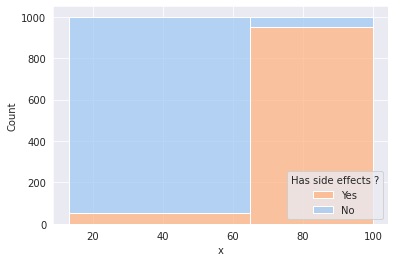

In [28]:
X_train = []
y_train = []

PARTICPANTS = 2000

GROUP_SIZE = PARTICPANTS // 2

for p in range(GROUP_SIZE):
    # Half were under 65 years old, 5% of them experienced have side effects
    random_young = randint(13, 64)
    
    X_train.append(random_young)
    y_train.append(True if (p / GROUP_SIZE) <= 0.05 else False)

    # Half were over 65 years old, 95% of them experienced side effects
    random_old = randint(65, 100)
    
    X_train.append(random_old)
    y_train.append(False if (p / GROUP_SIZE) <= 0.05 else True)

ax = sns.histplot(data={'x': X_train, 'y': y_train}, x='x', hue='y', legend=False, bins = [13, 65, 100], multiple="stack")

ax.legend(title='Has side effects ?', loc='lower right', labels=['Yes', 'No'])


In [57]:
X_train = np.array(X_train)
y_train = np.array(y_train)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_X_train = scaler.fit_transform((X_train).reshape(-1,1))

scaled_y_train = scaler.fit_transform((y_train).reshape(-1,1))
np.set_printoptions(threshold=2000)

# print(y_train, scaled_y_train.reshape((1, -1))[0])

In [65]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

model = Sequential([
    Dense(16, input_shape = (1,), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

# model.summary()

wandb.config = {
  "learning_rate": 0.001,
  "epochs": 20,
  "batch_size": 10
}

model.compile(Adam(lr=.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(scaled_X_train, y_train, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, callbacks=[WandbCallback()], verbose=2)


Epoch 1/20
180/180 - 0s - loss: 0.6356 - accuracy: 0.6939 - val_loss: 0.5317 - val_accuracy: 0.7450
Epoch 2/20
180/180 - 0s - loss: 0.4334 - accuracy: 0.8539 - val_loss: 0.2927 - val_accuracy: 0.9600
Epoch 3/20
180/180 - 0s - loss: 0.3075 - accuracy: 0.9217 - val_loss: 0.1996 - val_accuracy: 0.9900
Epoch 4/20
180/180 - 0s - loss: 0.2778 - accuracy: 0.9294 - val_loss: 0.1678 - val_accuracy: 0.9900
Epoch 5/20
180/180 - 0s - loss: 0.2688 - accuracy: 0.9322 - val_loss: 0.1519 - val_accuracy: 0.9750
Epoch 6/20
180/180 - 0s - loss: 0.2656 - accuracy: 0.9367 - val_loss: 0.1442 - val_accuracy: 0.9750
Epoch 7/20
180/180 - 0s - loss: 0.2616 - accuracy: 0.9300 - val_loss: 0.1430 - val_accuracy: 0.9950
Epoch 8/20
180/180 - 0s - loss: 0.2603 - accuracy: 0.9328 - val_loss: 0.1358 - val_accuracy: 1.0000
Epoch 9/20
180/180 - 0s - loss: 0.2570 - accuracy: 0.9311 - val_loss: 0.1328 - val_accuracy: 0.9900
Epoch 10/20
180/180 - 0s - loss: 0.2573 - accuracy: 0.9356 - val_loss: 0.1307 - val_accuracy: 1.0000